# How Skill depends on exposure density

This notebook explores how the model skill depends on the exposure density threshold ($n_{thresh}$) and plots Figure 7


First, we load the modules needed, including some key functions from utility.py

In [5]:
import sys, os
from pathlib import Path
#add path to path of current skript, where also utility.py lies
sys.path.append(Path.cwd().absolute())
#own utility functions
from utility import data_dir, read_at_centroid_data, compute_verification_stats, get_scores_from_exposure_threshs

import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib 
import colorcet as cc


Set up the analysis: Define croptypes (here, entries in list croptypes are merged to one crop type, so ```croptypes=['wheat','maize','barley','rapeseed']``` is used for the aggregate `field_crops`), directory of data and output figures, the hail hazard variable. Then load the at_centroid_data (i.e. the information on exposure, damage, and hail hazard at each centroid for each event.)

In [6]:
#%% SETUP
croptypes=['wheat','maize','barley','rapeseed'] 
datadir = f"{data_dir}/data_at_centroid/"
figdir = 'C:/Users/F80840370/projects/scClim/climada/scClim/subproj_D/papers/NHESS/fig/'
var='MESHS'
at_centroid_data={}
# load data for MESHS 
data, croptype = read_at_centroid_data(datadir,croptypes,variable=var)
at_centroid_data[var]=data

First, get skill scores as functions of exposure density threshold for a spatial resolution of 8km and a MESHS threshold of 20 mm. We find that it is mainly the FAR that changes while POD remains almost constant. 

,POD,FAR,HSS,CSI
0,0.815018,0.641418,0.413743,0.331595
10,0.814471,0.581506,0.463960,0.382071
20,0.813208,0.544879,0.493301,0.412046
30,0.809615,0.527497,0.506177,0.425253
40,0.808511,0.517321,0.511616,0.433161
50,0.808594,0.508897,0.518059,0.439957
60,0.804781,0.504294,0.519301,0.442497
70,0.806061,0.493655,0.527349,0.451357
80,0.806061,0.489117,0.530219,0.454960
90,0.806122,0.484334,0.532707,0.458769


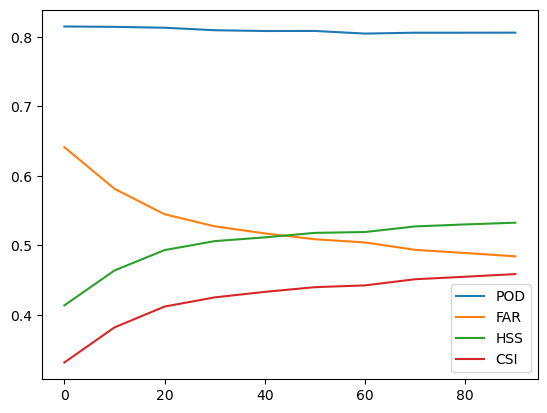

In [7]:
res='8km'
s=20 #hazard threshold
exposure_threshs=np.arange(0,100,10)
scores=['POD','FAR','HSS','CSI']


df=get_scores_from_exposure_threshs(at_centroid_data[var][res],var,s,exposure_threshs,scores)
fig,ax=plt.subplots()
df.plot(ax=ax)
#ax.set_xticks(np.arange(1,20,1))
#ax.set_ylim(0.2,0.7)

df

We see that it is mainly the FAR that depends on the exposure density threshold (it reduces with increasing threshold). Lets explore this more sytematically for all crops. First, load the at_centroid_data for all crops

In [37]:
#%% LOAD DATA
exposure_threshs=np.arange(1,100,1)  #used for plotting
#exposure_threshs=np.concatenate(([1],np.arange(0,101,10)))  #used for printing data
scores=['FAR']
croptypes_lists=[['Weizen','Mais','Gerste','Raps'],['Weizen'],['Mais'],['Raps'],['Gerste'],['Reben']]#,['Weizen'],['Mais'],['Gerste'],['Raps'],['Aepfel'],['Reben']]
en_names={'Weizen_Mais_Gerste_Raps': 'field crops','wheat_maize_barley_rapeseed': 'field crops','Weizen': 'wheat', 'Mais': 'maize','Raps': 'rapeseed','Gerste':'barley','Reben': 'grapevine'}
data={}
at_centroid_data_crops={}
df_FAR=pd.DataFrame(index=exposure_threshs)
for croptypes in croptypes_lists:
    cts=[en_names[ct] for ct in croptypes]
    at_centroid_data, croptype = read_at_centroid_data(datadir,cts,variable=var)
    if croptype in en_names.keys():
        name=en_names[croptype]
    else:
        name=croptype
    at_centroid_data_crops[name] = at_centroid_data




In [38]:
at_centroid_data_crops.keys()


dict_keys(['field crops', 'wheat', 'maize', 'rapeseed', 'barley', 'grapevine'])

Again use a MESHS threshold of 20 mm get the FAR as function of exposure threshold. Use 8km resolution for field crops and 1km for grapevine. Print the data to check whether the right thing has happened

In [47]:
s=20 #hazard threshold
scores=['POD','FAR','HSS','CSI']
for croptype in at_centroid_data_crops.keys():
    if croptype=='grapevine':
        res='1km'
        res_name='1 km'
        exp_threshs=np.arange(1,41,1) #used for plotting
        #exp_threshs=np.concatenate(([1],np.arange(0,40,5))) #used for printing data 
    else:
        res='8km'
        res_name='8 km'
        exp_threshs=exposure_threshs
        
    df=get_scores_from_exposure_threshs(at_centroid_data_crops[croptype][res],var,s,exp_threshs,scores=scores)
    data[croptype]=df
    df_FAR[f'{croptype} ({res_name})']=df['FAR']

df_FAR_grapevine=df_FAR['grapevine (1 km)']
df_FAR_field=df_FAR['field crops (8 km)']
#df_FAR=df_FAR.drop('grapevine (8 km)',axis=1)
df_FAR=df_FAR.drop('grapevine (1 km)',axis=1)
df_FAR=df_FAR.drop('field crops (8 km)',axis=1)

data

{'field crops':          POD       FAR       HSS       CSI
 1   0.815018  0.641418  0.413743  0.331595
 2   0.815018  0.630399  0.422643  0.340996
 3   0.815018  0.618353  0.433192  0.351223
 4   0.816176  0.606732  0.444392  0.361269
 5   0.815838  0.600901  0.449204  0.366116
 ..       ...       ...       ...       ...
 95  0.804928  0.485564  0.530406  0.457410
 96  0.804928  0.484888  0.531061  0.457944
 97  0.804928  0.484888  0.531061  0.457944
 98  0.804527  0.482119  0.533345  0.460000
 99  0.802495  0.481183  0.534038  0.460072
 
 [99 rows x 4 columns],
 'wheat':          POD       FAR       HSS       CSI
 1   0.859195  0.684932  0.375316  0.299599
 2   0.859195  0.671067  0.388266  0.312109
 3   0.861671  0.659841  0.398097  0.322546
 4   0.860870  0.646007  0.411818  0.334837
 5   0.860870  0.645161  0.411891  0.335593
 ..       ...       ...       ...       ...
 95  0.853383  0.507592  0.530831  0.454000
 96  0.852830  0.503297  0.532978  0.457490
 97  0.852830  0.503297  0

In [49]:
df_FAR_field

1     0.641418
2     0.630399
3     0.618353
4     0.606732
5     0.600901
        ...   
95    0.485564
96    0.484888
97    0.484888
98    0.482119
99    0.481183
Name: field crops (8 km), Length: 99, dtype: float64

Now plot this information as Figure (Figure 6 of the Paper)

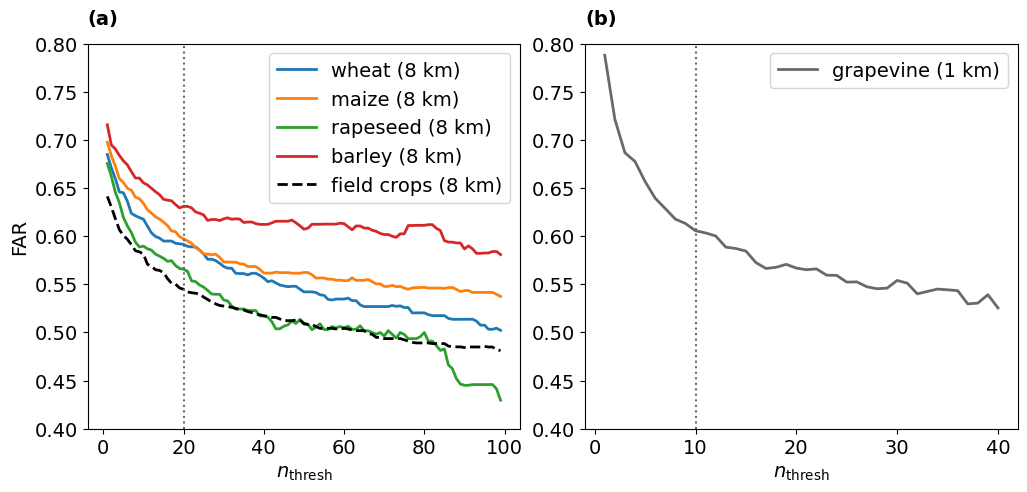

In [50]:
labels=['(a)','(b)']
#fontsizes
font_s=14
font_l=20
matplotlib.rcParams.update({'font.size': font_s, 'axes.labelsize':font_s})

fig,axs=plt.subplots(1,2,figsize=(12,5))
plt.subplots_adjust(wspace=0.15)
df_FAR.plot(ax=axs[0],linewidth=2)
df_FAR_field.plot(ax=axs[0],linewidth=2,color='k',linestyle='dashed')
df_FAR_grapevine.plot(ax=axs[1],color='dimgrey',linewidth=2)
axs[1].legend()
axs[0].legend()
axs[0].set_ylabel('FAR')
#plot horizontal thresholds
axs[0].axvline(x=20,color='dimgrey',linestyle='dotted')
axs[1].axvline(x=10,color='dimgrey',linestyle='dotted')
for i,ax in enumerate(axs):
    ax.text(0,1.05,labels[i],
                    transform=ax.transAxes,fontweight='bold')
    ax.set_xlabel(r'$n_{\mathrm{thresh}}$')
    ax.set_ylim(0.4,0.8)
    ax.set_yticks(np.arange(0.4,0.85,0.05))

Now, save the figure to png and pdf.

In [ ]:
fig.savefig(f'{figdir}/Figure_exposure_density.png',dpi=200,bbox_inches='tight')
fig.savefig(f'{figdir}/Figure_exposure_density.pdf',dpi=200,bbox_inches='tight')